In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [2]:
import uuid
import os
import time

## Load the model

In [2]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5x', pretrained=True)

Using cache found in /Users/sujaykumar/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2023-8-15 Python-3.10.12 torch-2.0.1 CPU

Fusing layers... 


[Errno 2] No such file or directory: '/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/numpy-1.24.3.dist-info/METADATA'


YOLOv5x summary: 444 layers, 86705005 parameters, 0 gradients
Adding AutoShape... 


In [3]:
img = 'street.jpg'
results = model(img)
print(results)

image 1/1: 684x1025 52 cars
Speed: 39.8ms pre-process, 498.1ms inference, 1.1ms NMS per image at shape (1, 3, 448, 640)


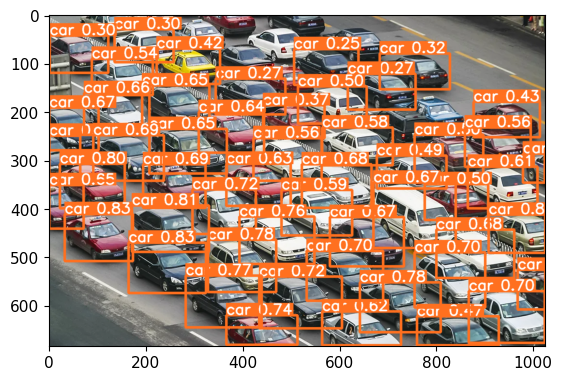

In [4]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

## Real Time Yolov5 Detections

In [5]:
# cap = cv2.VideoCapture('valid.mp4')
# while cap.isOpened():
#     ret, frame = cap.read()
#     result = model(frame)
#     cv2.imshow('YOLO',np.squeeze(result.render()))
#     if cv2.waitKey(10) & 0XFF == ord('q'):
#         break
# cap.release()
# cv2.destroyAllWindows()

## Train From Scratch

## Generate Dataset

In [7]:
IMAGES_PATH = os.path.join('new_data','images')
labels = ['awake','drowsy']
num_images = 50

In [9]:
# cap = cv2.VideoCapture(0)
# for label in labels:
#     time.sleep(5)
#     for i in range(0,num_images):
#         ret, frame = cap.read()
#         img_name = os.path.join(IMAGES_PATH,label+"."+str(uuid.uuid1())+".jpg")
#         cv2.imwrite(img_name,frame)
#         cv2.imshow('Collection',frame)
#         time.sleep(2)
#     if cv2.waitKey(10) & 0XFF == ord('q'):
#         break
# cap.release()
# cv2.destroyAllWindows()
        

In [9]:
!pip install pyqt5 lxml --upgrade
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

  Using cached PyQt5-5.15.9.tar.gz (3.2 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... -^C
anceled
ERROR: Operation cancelled by user
zsh:1: command not found: pyrcc5


In [10]:
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 5 --data dataset.yml --weights yolov5x.pt

^C
Traceback (most recent call last):
  File "/Users/sujaykumar/Desktop/Programs/Deep_Learning/yolo/drowsiness_driver/yolov5/train.py", line 61, in <module>
    from utils.loggers import Loggers
  File "/Users/sujaykumar/Desktop/Programs/Deep_Learning/yolo/drowsiness_driver/yolov5/utils/loggers/__init__.py", line 23, in <module>
    from torch.utils.tensorboard import SummaryWriter
  File "/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/torch/utils/tensorboard/__init__.py", line 2, in <module>
    from distutils.version import LooseVersion
  File "<frozen importlib._bootstrap>", line 1027, in _find_and_load
  File "<frozen importlib._bootstrap>", line 1002, in _find_and_load_unlocked
  File "<frozen importlib._bootstrap>", line 945, in _find_spec
  File "/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/_distutils_hack/__init__.py", line 97, in find_spec
    return method()
  File "/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/_distutils_hack/__init__.py",

In [3]:
model = torch.hub.load('ultralytics/yolov5','custom',path='yolov5/runs/train/exp4/weights/best.pt',force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /Users/sujaykumar/.cache/torch/hub/master.zip
YOLOv5 🚀 2023-8-16 Python-3.10.12 torch-2.0.1 CPU

Fusing layers... 


[Errno 2] No such file or directory: '/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/numpy-1.24.3.dist-info/METADATA'


Model summary: 322 layers, 86180143 parameters, 0 gradients
Adding AutoShape... 


In [4]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 80, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(80, 160, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(160, 80, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(160, 80, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(160, 160, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(80, 80, kernel_size=(1, 1), stride=(1, 1

In [17]:
import os
img = os.path.join('data','images','0b5279e4-awake.bb3d5350-3b38-11ee-b09b-06322f3af129.jpg')

In [18]:
results = model(img)

In [19]:
results.print()

image 1/1: 720x1280 1 awake
Speed: 26.6ms pre-process, 461.8ms inference, 0.3ms NMS per image at shape (1, 3, 384, 640)


In [ ]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    result = model(frame)
    cv2.imshow('YOLO',np.squeeze(result.render()))
    if cv2.waitKey(10) & 0XFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

[ WARN:0@37.718] global /private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_562_cazh1h/croots/recipe/opencv-suite_1664548333142/work/modules/videoio/src/cap_gstreamer.cpp (862) isPipelinePlaying OpenCV | GStreamer warning: GStreamer: pipeline have not been created


In [20]:
plt.imshow(np.squeeze(results.render()))
plt.show()